# Exploring the ISIC Dataset


Here is someone's guide to the competition: [Link](https://www.kaggle.com/competitions/isic-2024-challenge/discussion/543310)
The authors main takeaways: 
 - Use state of the art foundation models 
 - Clean, augment, and batchify the data 


## Basics of the Data 
- Data split into 2 sets: train, test 
- Both sets contain an image paired with metadata. The metadata contains basics such as age, lots of valuable information that describes the image in greater detail. There is information about shape, color, perimeter, location on body, etc 
- The images come from a device that captures total-body-photography
- The images are all of uniform size (15x15)mm
> Vectra WB360, a 3D TBP product from Canfield Scientific, captures the complete visible cutaneous surface area in one macro-quality resolution tomographic image. An AI-based software then identifies individual lesions on a given 3D capture. This allows for the image capture and identification of all lesions on a patient, which are exported as individual 15x15 mm field-of-view cropped photos. The dataset contains every lesion from a subset of thousands of patients seen between the years 2015 and 2024 across nine institutions and three continents.

The images come in a hdf5 file format. The hdf5 file format allows for easy storage of large amounts of data with easy retrieval. To access it we need to use a few python libraries such as hdf5. However within this file structure, the images are stored as jpegs. 

## Grabbing Images from h5df format

In [2]:
#Imports 
import os
import h5py
import numpy as np
from PIL import Image
import random

In [19]:
file_dict = {
    "sample_sub": "submission.csv",
    "test_images": "test-image.hdf5",
    "test_metadata": "test-metadata.csv",
    "train_images": "train-image.hdf5",
    "train_metadata": "train-metadata.csv"
}
for key in file_dict.keys():
    path = os.path.join(os.getcwd(), '/projectnb/cs640grp/materials/ISIC-2024_CS640', file_dict[key])
    path = os.path.normpath(path)
    file_dict[key] = path
file_dict

{'sample_sub': '/projectnb/cs640grp/materials/ISIC-2024_CS640/submission.csv',
 'test_images': '/projectnb/cs640grp/materials/ISIC-2024_CS640/test-image.hdf5',
 'test_metadata': '/projectnb/cs640grp/materials/ISIC-2024_CS640/test-metadata.csv',
 'train_images': '/projectnb/cs640grp/materials/ISIC-2024_CS640/train-image.hdf5',
 'train_metadata': '/projectnb/cs640grp/materials/ISIC-2024_CS640/train-metadata.csv'}

In [76]:
# Code Attribution: https://www.geeksforgeeks.org/hdf5-files-in-python/
path = file_dict["train_images"]
f = h5py.File(path, 'r')
print("Count of data: ", len(f.keys()))
list(f.keys())[:5]



Count of data:  401059


['ISIC_0015670',
 'ISIC_0015845',
 'ISIC_0015864',
 'ISIC_0015902',
 'ISIC_0024200']

In the cell above we grab keys from the h5 file and print the first 5 datsets. We see our counts of keys is about 400k. Each of these corresponds to a single image of a lesion. The key also corresponds to the unique key of the metadataset. 


In [77]:
keys = list(f.keys())
imageo = f[keys[0]] #first image

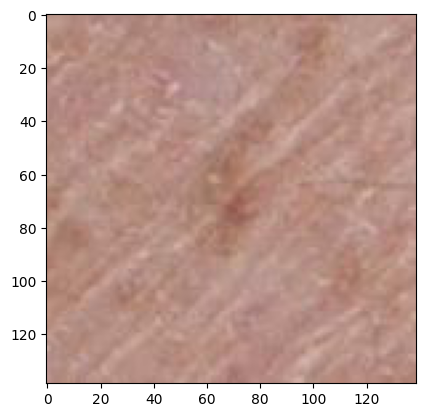

In [78]:
import h5py
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
with h5py.File(file_dict["train_images"]) as f:
    plt.imshow(Image.open(BytesIO(imageo[()])))
    # to get the image we need to go from bytes to image

In [79]:
t = Image.open(BytesIO(imageo[()]))
t.size
# We see here the size is 139 by 139 

(139, 139)

## Grabbing Metadata 
Once we have the keys from the images dataset, we can pull the metadata. It will nearly be the same but now there are multiple groups and then datasets within each group 

In [84]:
import pandas as pd

df = pd.read_csv(file_dict["train_metadata"])

# Display the first few rows of the DataFrame
print(df.head())
path = file_dict["train_metadata"]
df = pd.read_csv(path)
print("Count of df metadata: ", len(df))
display(df.head)

/var/folders/sj/jrl3rpvd1n342bw08d2jtsb40000gn/T/ipykernel_3566/3087869422.py:3: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_dict["train_metadata"])


        isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx

/var/folders/sj/jrl3rpvd1n342bw08d2jtsb40000gn/T/ipykernel_3566/3087869422.py:8: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Count of df metadata:  401059


<bound method NDFrame.head of              isic_id  target  patient_id  age_approx     sex  \
0       ISIC_0015670       0  IP_1235828        60.0    male   
1       ISIC_0015845       0  IP_8170065        60.0    male   
2       ISIC_0015864       0  IP_6724798        60.0    male   
3       ISIC_0015902       0  IP_4111386        65.0    male   
4       ISIC_0024200       0  IP_8313778        55.0    male   
...              ...     ...         ...         ...     ...   
401054  ISIC_9999937       0  IP_1140263        70.0    male   
401055  ISIC_9999951       0  IP_5678181        60.0    male   
401056  ISIC_9999960       0  IP_0076153        65.0  female   
401057  ISIC_9999964       0  IP_5231513        30.0  female   
401058  ISIC_9999967       0  IP_6426047        50.0    male   

       anatom_site_general  clin_size_long_diam_mm          image_type  \
0          lower extremity                    3.04  TBP tile: close-up   
1                head/neck                    1.10  T

In [87]:
#Here are all the keys and values for the first row 
df.iloc[0]

isic_id                                                   ISIC_0015670
target                                                               0
patient_id                                                  IP_1235828
age_approx                                                        60.0
sex                                                               male
anatom_site_general                                    lower extremity
clin_size_long_diam_mm                                            3.04
image_type                                          TBP tile: close-up
tbp_tile_type                                                3D: white
tbp_lv_A                                                     20.244422
tbp_lv_Aext                                                  16.261975
tbp_lv_B                                                     26.922447
tbp_lv_Bext                                                  23.954773
tbp_lv_C                                                     33.684638
tbp_lv

/var/folders/sj/jrl3rpvd1n342bw08d2jtsb40000gn/T/ipykernel_3566/2879593244.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  key_b = df.iloc[1][0]


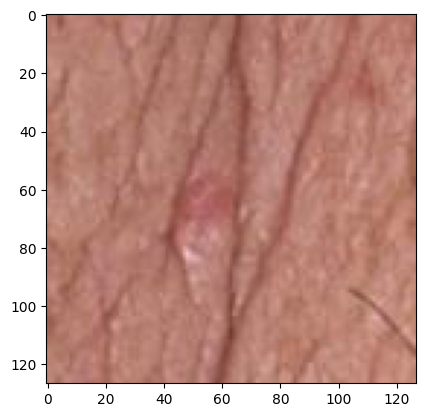

In [93]:
key_b = df.iloc[1][0]

with h5py.File(file_dict["train_images"]) as f:
    imageb = f[key_b]
    plt.imshow(Image.open(BytesIO(imageb[()])))

/var/folders/sj/jrl3rpvd1n342bw08d2jtsb40000gn/T/ipykernel_3566/2668204317.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  key_temp = df.iloc[num][0]


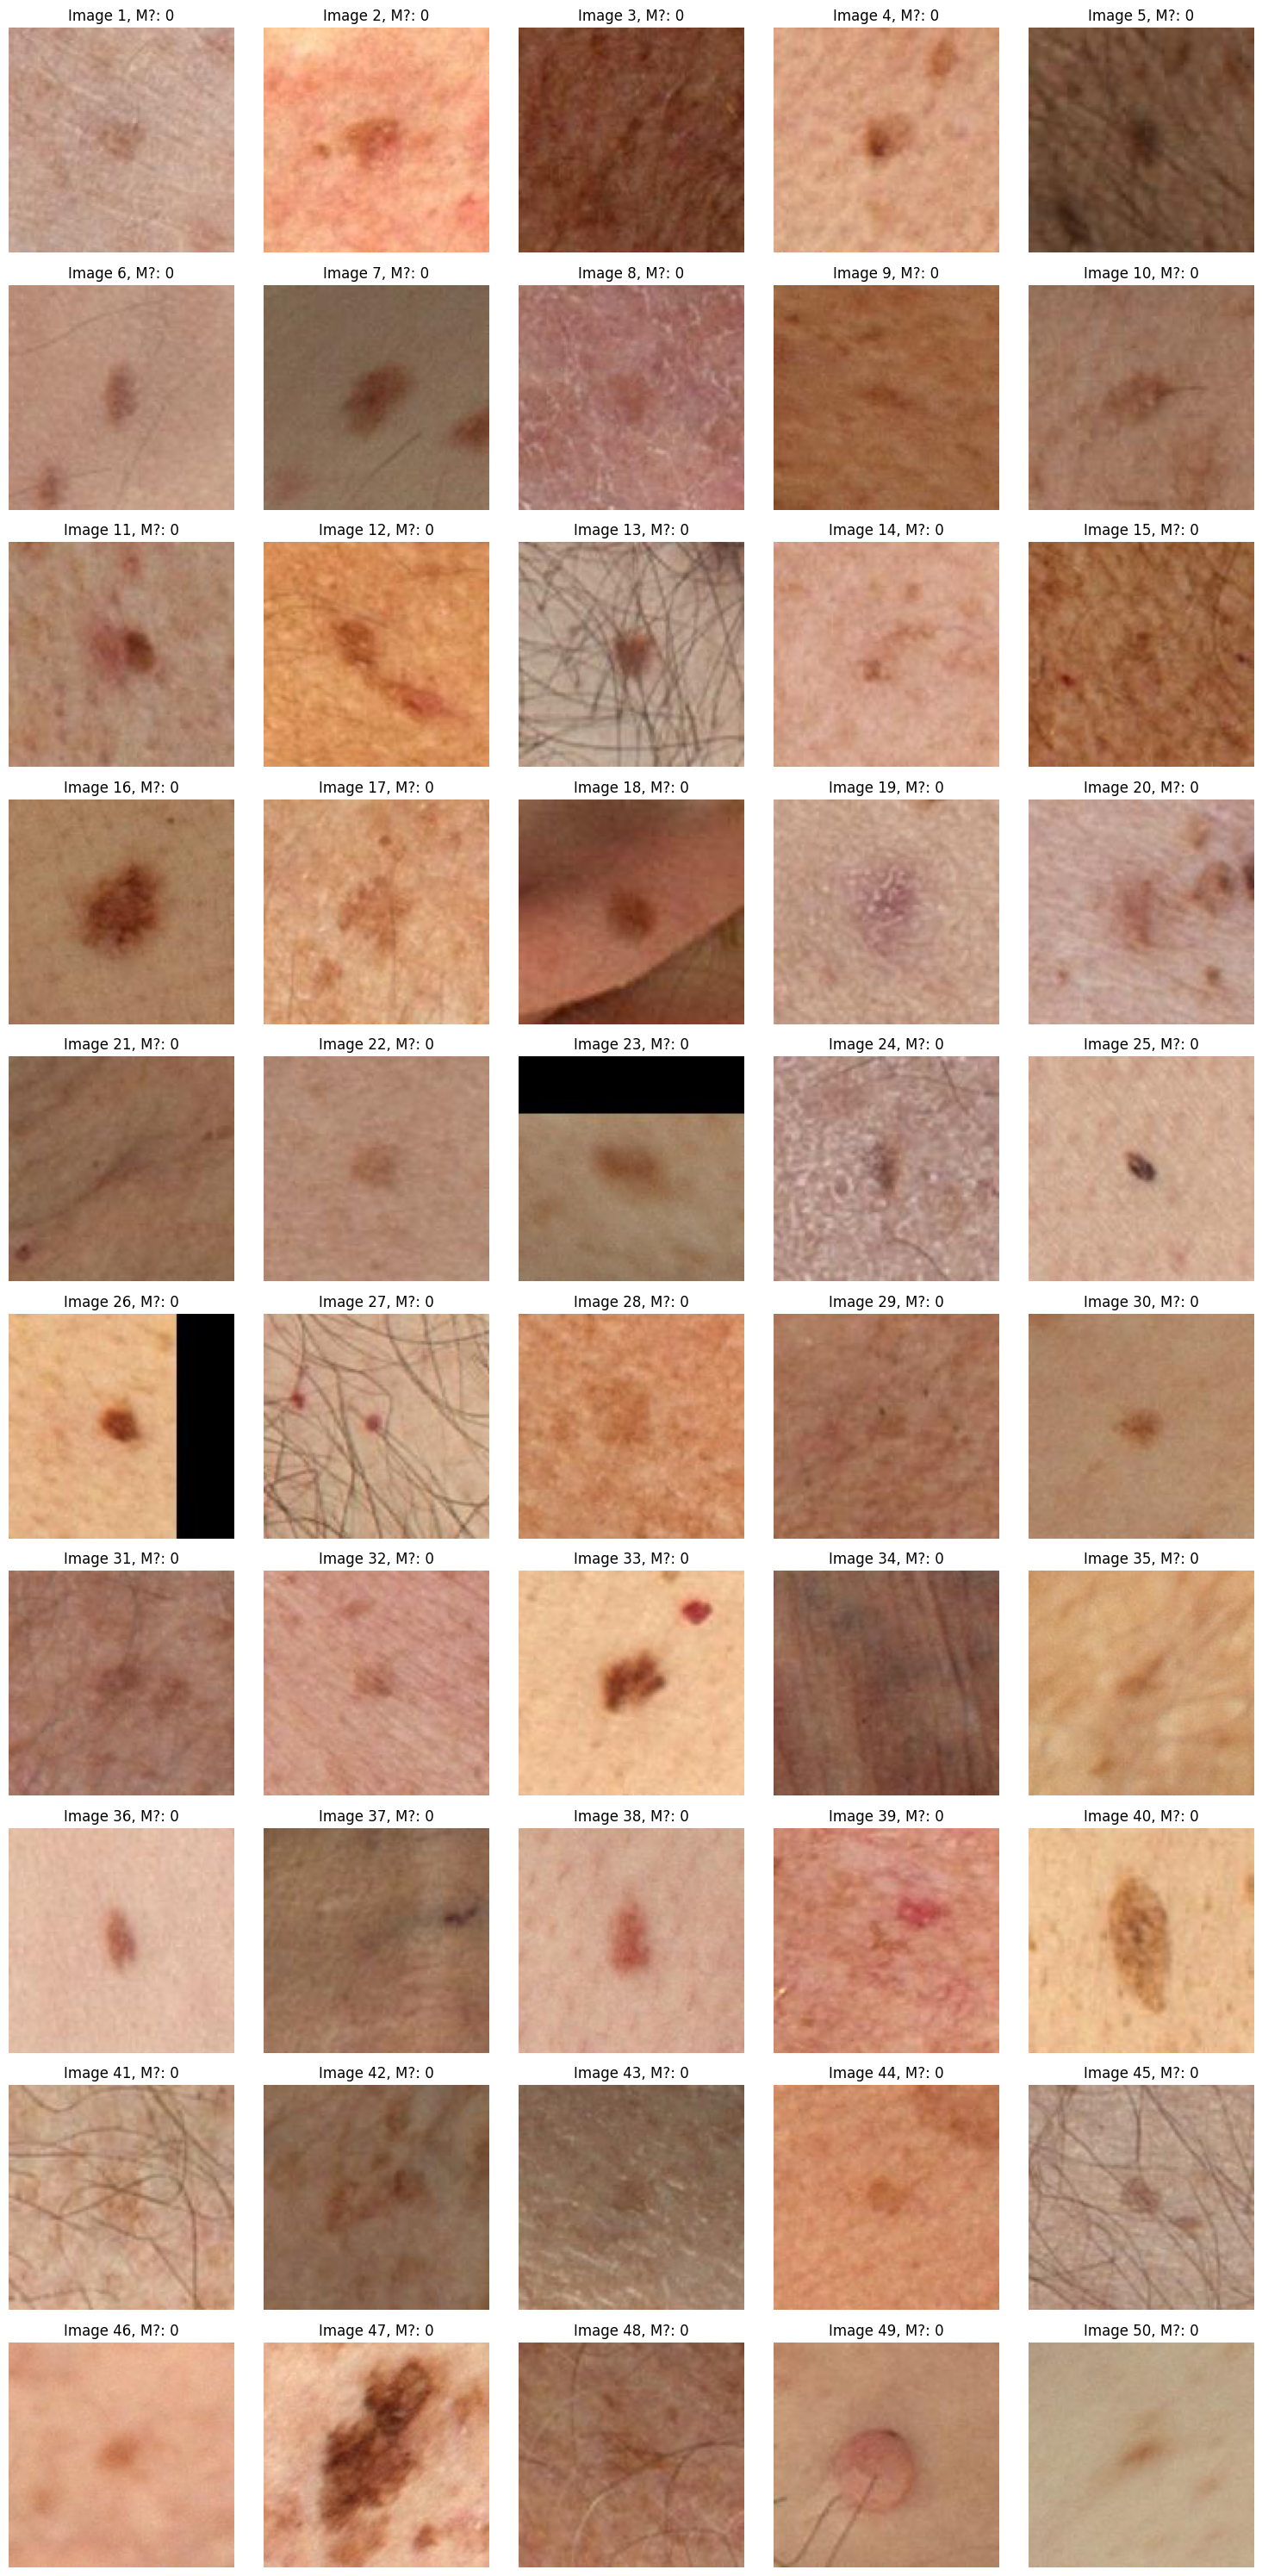

In [110]:
# Lets see 30 random images 
import random
import math
# Generate 30 random numbers between 0 and 400,000
random_numbers = random.sample(range(400001), 50)
with h5py.File(file_dict["train_images"]) as f:
    num_images = len(random_numbers)
    # Create subplots with dynamic grid size
    num_cols = 5  # You can set this to any number
    num_rows = math.ceil(num_images / num_cols)  # Calculate rows needed for all images
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*3, num_rows*3))
    axes = axes.ravel()  # Flatten the axes array to easily iterate over

    # Loop through the 30 random numbers and display images
    for i, num in enumerate(random_numbers):
        key_temp = df.iloc[num][0]
        target = df.iloc[num]['target']
        img = f[key_temp]
        image = Image.open(BytesIO(img[()]))
        
        axes[i].imshow(image)
        axes[i].axis('off')  # Hide axes for better visualization
        axes[i].set_title(f"Image {i+1}, M?: {target}")
        
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    
# ATTRIBUTION: CODE DEBUGGED WITH CHATGPT

## Thoughts on the images: 
Images are uniform. Most of them have distracting features such as hair. The images aren't exactly clear. Also most of the images are non-malignant hence there is a huge distrbution  

# Distributions & Statistics


In [2]:
# Alright lets look at some statistics about the data we have, lets look for biases, lets look for abnormal, distribution, and lets think about the 
# what this might tell us about limitations of the model. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

trm_df = pd.read_csv(file_dict["train_metadata"])
tem_df = pd.read_csv(file_dict["test_metadata"]) 

# Display the first few rows of the DataFrame
print(trm_df.head())
#print(tem_df.head())

/scratch/1400258.1.csgpu/ipykernel_2169216/3072544521.py:4: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  trm_df = pd.read_csv(file_dict["train_metadata"])


        isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx

## Count Table

In [17]:
target_counts = trm_df['target'].value_counts()

print(target_counts)

target
0    400666
1       393
Name: count, dtype: int64


## The Basic Distributions 

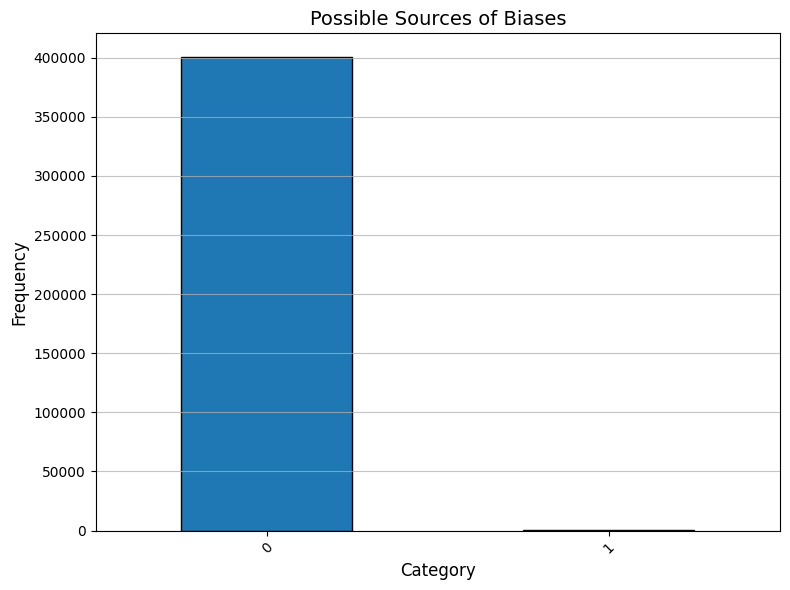

In [7]:
value_counts = trm_df['target'].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', edgecolor='black')
plt.title('Possible Sources of Biases', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### This is the biggest bias in the dataset. Most of the cases non-malignant, hence even if we don't learn a model and predict "NO" for all cases we will have a ~99% raw accuracy. Hence, it is crucial we sample to create our own train, validate, test. It would be ideal to have some type of near 50-50 split. 

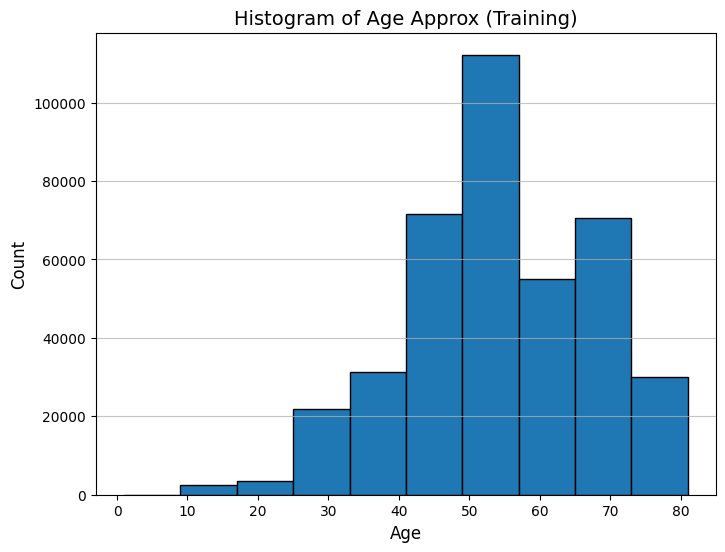

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(trm_df["age_approx"], bins=10, edgecolor='black', align='left')
plt.title(f'Histogram of {"Age Approx (Training)"}', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

### This historgram doesn't have much of a bias. The true human population is skewed right, in the theoretical diagram above, but since skin cancer probability grows with exposure to UV rays aswell as aging of the human body, it makes sense to see the distribution skew left. However, there still may be some bias in this, since children could be less likely to get checked for skin cancer.

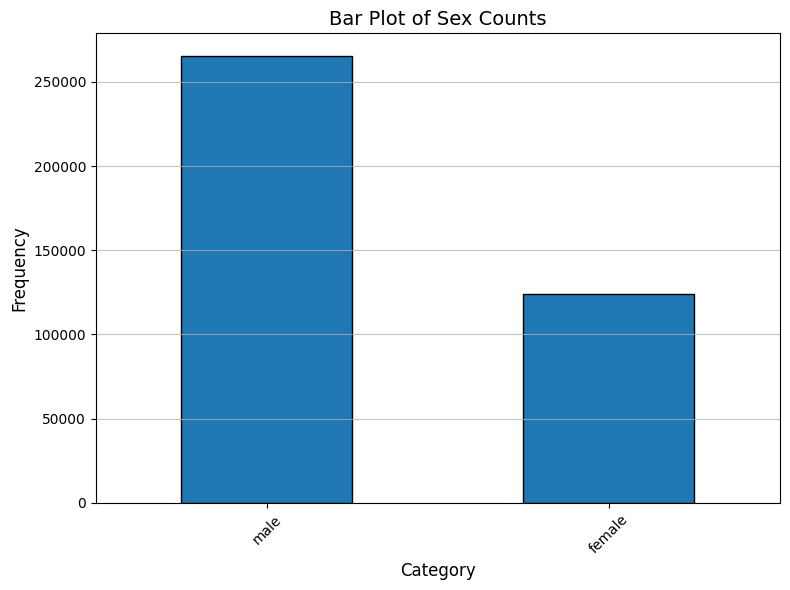

In [9]:
value_counts = trm_df['sex'].value_counts()
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', edgecolor='black')
plt.title('Bar Plot of Sex Counts', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

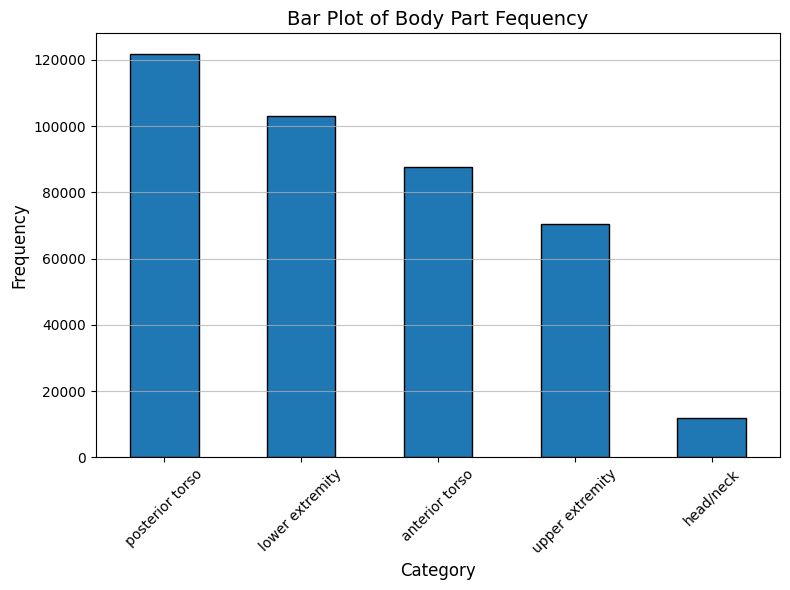

In [10]:
value_counts = trm_df['anatom_site_general'].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', edgecolor='black')
plt.title('Bar Plot of Body Part Fequency', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

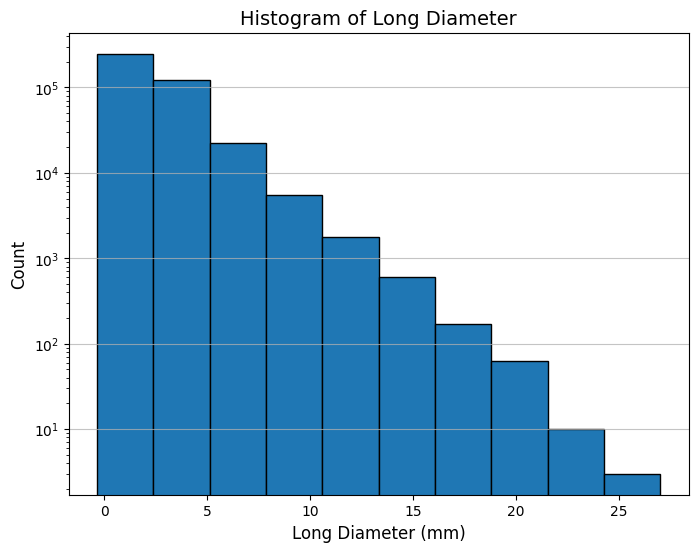

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(trm_df["clin_size_long_diam_mm"], bins=10, edgecolor='black', align='left', log = True)
plt.title(f'Histogram of {"Long Diameter"}', fontsize=14)
plt.xlabel('Long Diameter (mm)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

## Some Advance Distributions

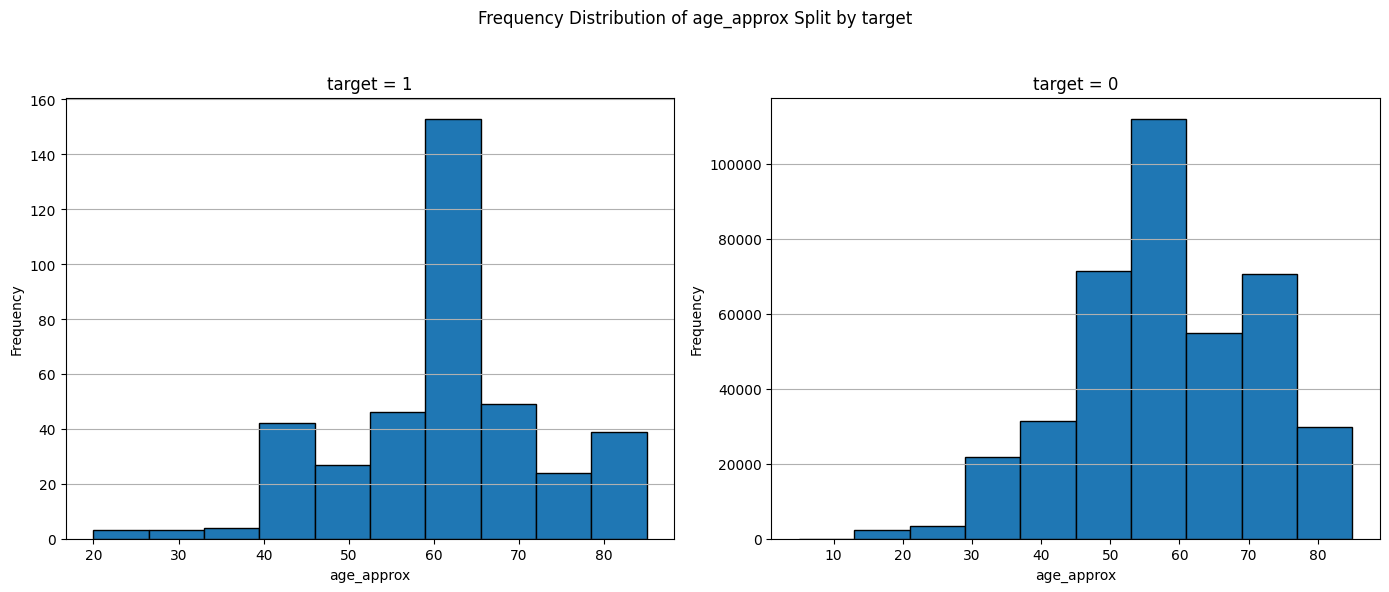

In [16]:
import matplotlib.pyplot as plt

def plot_separate_histograms(trm_df, col1, col2, bins=10):
    
    malig_data = trm_df[trm_df[col1] == 1][col2]
    nonma_data = trm_df[trm_df[col1] == 0][col2]

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.hist(malig_data, bins=bins,  edgecolor="black")
    plt.title(f"{col1} = 1")
    plt.xlabel(col2)
    plt.ylabel("Frequency")
    plt.grid(axis='y')

    plt.subplot(1, 2, 2)
    plt.hist(nonma_data, bins=bins, edgecolor="black")
    plt.title(f"{col1} = 0")
    plt.xlabel(col2)
    plt.ylabel("Frequency")
    plt.grid(axis='y')

    plt.suptitle(f"Frequency Distribution of {col2} Split by {col1}")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


plot_separate_histograms(trm_df, col1="target", col2="age_approx", bins=10)
